# One-dimensional (1D) Ising Model

Vengono di seguito riportato le stime con incertezza delle grandezze $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$, di un modello di Ising 1D di $N = 50$ spins e campo magnetico esterno $J = 1$. Nello stesso grafico figurano i risultati ottenuti con due metodi di campionamento, Metropolis e Gibbs. Queste vengono inoltre comparate con le curve esatte in un intervallo di temperatura $T$ $\left[0.5;2.0\right]$.

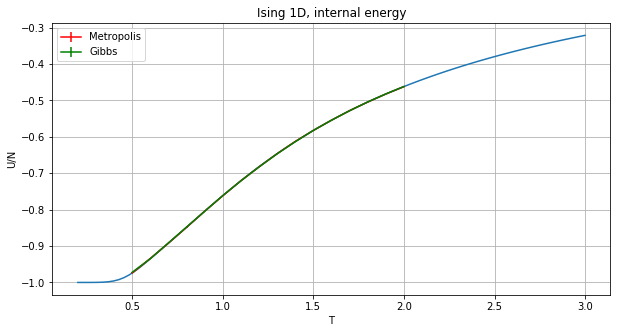

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
ax.plot(T, e)


x, f, error = np.loadtxt("Metropolis/output.ene.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="red", label='Metropolis')

x, f, error = np.loadtxt("Gibbs/output.ene.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="green", label='Gibbs')

ax.set_title('Ising 1D, internal energy')
ax.set_xlabel('T')
ax.set_ylabel('U/N')
ax.grid(True)
ax.legend()

plt.show()

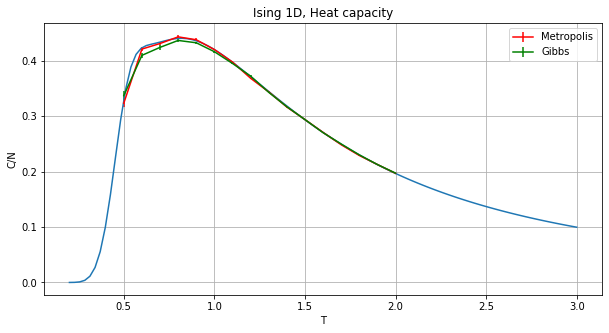

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax.plot(T, heat)

x, f, error = np.loadtxt("Metropolis/output.heat.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="red", label='Metropolis')

x, f, error = np.loadtxt("Gibbs/output.heat.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="green", label='Gibbs')


ax.set_title('Ising 1D, Heat capacity')
ax.set_xlabel('T')
ax.set_ylabel('C/N')
ax.grid(True)
ax.legend()

plt.show()

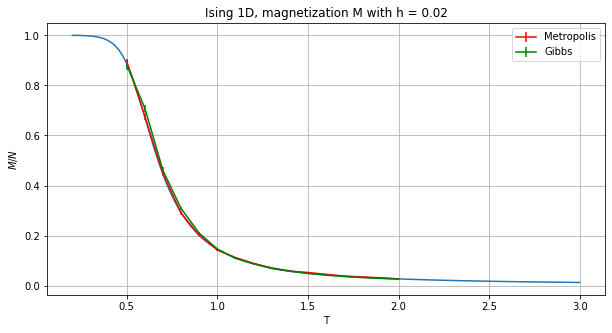

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
ax.plot(T, M)

x, f, error = np.loadtxt("Metropolis/output.mag.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="red", label='Metropolis')

x, f, error = np.loadtxt("Gibbs/output.mag.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="green", label='Gibbs')


ax.set_title('Ising 1D, magnetization M with h = 0.02')
ax.set_xlabel('T')
ax.set_ylabel('$M/N$')
ax.grid(True)
ax.legend()

plt.show()

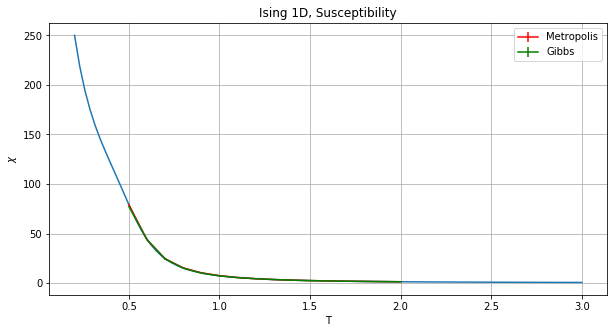

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax.plot(T, X)

x, f, error = np.loadtxt("Metropolis/output.chi.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="red", label='Metropolis')

x, f, error = np.loadtxt("Gibbs/output.chi.final", usecols=(0,1,2), delimiter=' ', unpack='true')
ax.errorbar(x,f,yerr=error, color="green", label='Gibbs')

ax.set_title('Ising 1D, Susceptibility')
ax.set_xlabel('T')
ax.set_ylabel('$\chi$')
ax.grid(True)
ax.legend()

plt.show()

Ciascun punto di ogni curva è ottenuta tramite blocking average di $N=40$ blocchi di $L=10^4$ punti. Prima di procedere alla raccolta dati, a ciascuna temperatura $T$ il sistema viene equilibrato facendolo evolvere per $2 \cdot 10^4$ steps.
Per entrambi i metodi di campionamento i dati ottenuti sono perfettamente in accordo con le curve esatte. Un leggero scostamento viene riscontrato per il campionamento Gibbs della capacità termica.